# MNIST Digit Classification with our own Framework

Lab Assignment from [AI for Beginners Curriculum](https://github.com/microsoft/ai-for-beginners).

### Reading the Dataset

This code download the dataset from the repository on the internet. You can also manually copy the dataset from `/data` directory of AI Curriculum repo.

In [16]:
!rm *.pkl
!wget -O mnist.pkl.gz https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true
!gzip -d mnist.pkl.gz

--2024-05-24 19:13:07--  https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz [following]
--2024-05-24 19:13:08--  https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mnielsen/neural-networks-and-deep-learning/master/data/mnist.pkl.gz [following]
--2024-05-24 19:13:08--  https://raw.githubusercontent.com/mnielsen/neural-networks-and-deep-learning/master/data/mnist.pkl.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Conne

In [17]:
import pickle
with open('mnist.pkl','rb') as f:
    tr_d, va_d, te_d = pickle.load(f, encoding='latin1')
    
print(tr_d[0][0][130:180])
print(tr_d[1][0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01171875 0.0703125
 0.0703125  0.0703125  0.4921875  0.53125    0.68359375 0.1015625
 0.6484375  0.99609375 0.96484375 0.49609375 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1171875  0.140625
 0.3671875  0.6015625 ]
5


In [18]:
import numpy as np
data = tr_d[0].astype(np.float32)
labels = tr_d[1]

Let's see what is the shape of data that we have:

In [19]:
data.shape

(50000, 784)

### Splitting the Data

We will use Scikit Learn to split the data between training and test dataset:

In [20]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(data,labels,test_size=0.2)

print(f"Train samples: {len(features_train)}, test samples: {len(features_test)}")

Train samples: 40000, test samples: 10000


### Instructions

1. Take the framework code from the lesson and paste it into this notebook, or (even better) into a separate Python module
1. Define and train one-layered perceptron, observing training and validation accuracy during training
1. Try to understand if overfitting took place, and adjust layer parameters to improve accuracy
1. Repeat previous steps for 2- and 3-layered perceptrons. Try to experiment with different activation functions between layers.
1. Try to answer the following questions:
    - Does the inter-layer activation function affect network performance?
    - Do we need 2- or 3-layered network for this task?
    - Did you experience any problems training the network? Especially as the number of layers increased.
    - How do weights of the network behave during training? You may plot max abs value of weights vs. epoch to understand the relation.

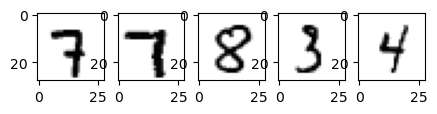

7
7
8
3
4


In [21]:
import matplotlib.pyplot as plt
def display_images(digits):
    count = len(digits)
    fig = plt.figure(figsize=(count,5))
    for i in range(count):
        ax = fig.add_subplot(1,count,i+1)
        plt.imshow(digits[i].reshape(28,28), cmap='binary')
    plt.show()

def display_labels(labels):
    for i in labels:
        print(i)

display_images(features_train[0:5])
display_labels(labels_train[0:5])

In [22]:
class Linear:
    def __init__(self,nin,nout):
        self.W = np.random.normal(0, 1.0/np.sqrt(nin), (nout, nin))
        self.b = np.zeros((1,nout))
        
    def forward(self, x):
        return np.dot(x, self.W.T) + self.b
    
net = Linear(784,10)
net.forward(features_train[0:5])

array([[ 0.46372   ,  0.32218979, -0.29316967,  0.01739348, -0.41159712,
         0.37300109, -0.05881704,  0.09799626, -0.20697908,  0.04960895],
       [ 0.35945865, -0.16871001, -0.3189146 , -0.30814436, -0.56502115,
         0.18268804,  0.06539707,  0.41334089, -0.42443482,  0.14552346],
       [-0.10876787,  0.06253782, -0.37690046, -0.56500716, -0.08441659,
        -0.00123758,  0.08095067, -0.06146591, -0.27549551,  0.02391668],
       [ 0.16273708, -0.06197089, -0.16835942, -0.23830559, -0.30593283,
         0.33384304, -0.04151278, -0.11693335,  0.03518626,  0.23306523],
       [-0.06846235, -0.05899266,  0.19951367, -0.4420556 , -0.28030854,
         0.51425292,  0.0033818 , -0.35716707, -0.0804187 ,  0.11979612]])

In [23]:
class Softmax:
    def forward(self,z):
        zmax = z.max(axis=1,keepdims=True)
        expz = np.exp(z-zmax)
        Z = expz.sum(axis=1,keepdims=True)
        return expz / Z

softmax = Softmax()
softmax.forward(net.forward(features_train[0:5]))

array([[0.14779523, 0.12829054, 0.06933418, 0.09458522, 0.06159068,
        0.1349776 , 0.08764466, 0.10252472, 0.07557523, 0.09768194],
       [0.14473061, 0.08534531, 0.07344236, 0.07423763, 0.0574201 ,
        0.1212802 , 0.10785768, 0.15274294, 0.06608757, 0.1168556 ],
       [0.10030931, 0.11905245, 0.0767172 , 0.06356222, 0.10278195,
        0.11169688, 0.12126485, 0.10516815, 0.08490482, 0.11454217],
       [0.11732465, 0.093713  , 0.08425504, 0.07856311, 0.07342577,
        0.13921937, 0.09564994, 0.08870129, 0.10327487, 0.12587295],
       [0.09412604, 0.09502162, 0.12305246, 0.06478289, 0.07615636,
        0.16856982, 0.10113729, 0.07052237, 0.09300734, 0.11362382]])

In [24]:
class CrossEntropyLoss:
    def forward(self,p,y):
        self.p = p
        self.y = y
        p_of_y = p[np.arange(len(y)), y]
        log_prob = np.log(p_of_y)
        return -log_prob.mean() # average over all input samples

cross_ent_loss = CrossEntropyLoss()
p = softmax.forward(net.forward(features_train[0:5]))
cross_ent_loss.forward(p,labels_train[0:5])

2.3483388735139323

In [25]:
class Linear:
    def __init__(self,nin,nout):
        self.W = np.random.normal(0, 1.0/np.sqrt(nin), (nout, nin))
        self.b = np.zeros((1,nout))
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)
        
    def forward(self, x):
        self.x=x
        return np.dot(x, self.W.T) + self.b
    
    def backward(self, dz):
        dx = np.dot(dz, self.W)
        dW = np.dot(dz.T, self.x)
        db = dz.sum(axis=0)
        self.dW = dW
        self.db = db
        return dx
    
    def update(self,lr):
        self.W -= lr*self.dW
        self.b -= lr*self.db
        
class Softmax:
    def forward(self,z):
        self.z = z
        zmax = z.max(axis=1,keepdims=True)
        expz = np.exp(z-zmax)
        Z = expz.sum(axis=1,keepdims=True)
        return expz / Z
    def backward(self,dp):
        p = self.forward(self.z)
        pdp = p * dp
        return pdp - p * pdp.sum(axis=1, keepdims=True)
    
class CrossEntropyLoss:
    def forward(self,p,y):
        self.p = p
        self.y = y
        p_of_y = p[np.arange(len(y)), y]
        log_prob = np.log(p_of_y)
        return -log_prob.mean()
    def backward(self,loss):
        dlog_softmax = np.zeros_like(self.p)
        dlog_softmax[np.arange(len(self.y)), self.y] -= 1.0/len(self.y)
        return dlog_softmax / self.p
    
lin = Linear(784,10)
softmax = Softmax()
cross_ent_loss = CrossEntropyLoss()

learning_rate = 0.1

pred = np.argmax(lin.forward(features_train),axis=1)
acc = (pred==labels_train).mean()
print("Initial accuracy: ",acc)

batch_size=4
for i in range(0,len(features_train),batch_size):
    xb = features_train[i:i+batch_size]
    yb = labels_train[i:i+batch_size]
    
    # forward pass
    z = lin.forward(xb)
    p = softmax.forward(z)
    loss = cross_ent_loss.forward(p,yb)
    
    # backward pass
    dp = cross_ent_loss.backward(loss)
    dz = softmax.backward(dp)
    dx = lin.backward(dz)
    lin.update(learning_rate)
    
pred = np.argmax(lin.forward(features_train),axis=1)
acc = (pred==labels_train).mean()
print("Final accuracy: ",acc)

Initial accuracy:  0.102475
Final accuracy:  0.87915


In [26]:
class Net:
    def __init__(self):
        self.layers = []
    
    def add(self,l):
        self.layers.append(l)
        
    def forward(self,x):
        for l in self.layers:
            x = l.forward(x)
        return x
    
    def backward(self,z):
        for l in self.layers[::-1]:
            z = l.backward(z)
        return z
    
    def update(self,lr):
        for l in self.layers:
            if 'update' in l.__dir__():
                l.update(lr)
                
net = Net()
net.add(Linear(784,10))
net.add(Softmax())
loss = CrossEntropyLoss()

def get_loss_acc(x,y,loss=CrossEntropyLoss()):
    p = net.forward(x)
    l = loss.forward(p,y)
    pred = np.argmax(p,axis=1)
    acc = (pred==y).mean()
    return l,acc

train_x = features_train
train_labels = labels_train
test_x = features_test
test_labels = labels_test

print("Initial loss={}, accuracy={}: ".format(*get_loss_acc(train_x,train_labels)))

def train_epoch(net, train_x, train_labels, loss=CrossEntropyLoss(), batch_size=4, lr=0.1):
    for i in range(0,len(train_x),batch_size):
        xb = train_x[i:i+batch_size]
        yb = train_labels[i:i+batch_size]

        p = net.forward(xb)
        l = loss.forward(p,yb)
        dp = loss.backward(l)
        dx = net.backward(dp)
        net.update(lr)
 
train_epoch(net,train_x,train_labels)
        
print("Final loss={}, accuracy={}: ".format(*get_loss_acc(train_x,train_labels)))
print("Test loss={}, accuracy={}: ".format(*get_loss_acc(test_x,test_labels)))

Initial loss=2.350030817126181, accuracy=0.105175: 
Final loss=0.4111977557359981, accuracy=0.878125: 
Test loss=0.4451788350091269, accuracy=0.8747: 
